<a href="https://colab.research.google.com/github/aaaraafaat/Computer-Vision/blob/main/Face_Recog_Test_Using_Webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Recognition Test Using Webcam
##Step 1: Install Required Libraries
Descriptions (AI-Gen)

This cell installs the necessary Python libraries for the face recognition task. The `!` prefix indicates a shell command being run directly in the Colab environment.

*   `!pip install face_recognition opencv-python matplotlib`: This command installs:
    *   `face_recognition`: A library for robust face detection, recognition, and manipulation.
    *   `opencv-python`: Python bindings for OpenCV, a powerful library for computer vision tasks.
    *   `matplotlib`: A plotting library used for displaying images and visualizations.

In [1]:
!pip install face_recognition opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=d44e25a6709a9b4de5b034694b61add817f6b04ef92d7132024cd4eca83cae38
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


## Step 2: Import Required Modules

This cell imports all the required Python modules that will be used throughout the notebook for webcam interaction, image manipulation, and face recognition.

*   `from IPython.display import display, Javascript`: Imports `display` to render output and `Javascript` to embed and execute JavaScript code in Colab.
*   `from google.colab.output import eval_js`: Imports `eval_js` to execute JavaScript and return its result to Python, essential for capturing webcam input.
*   `import numpy as np`: Imports the NumPy library, aliased as `np`, for efficient numerical operations, especially for handling image data as arrays.
*   `import cv2`: Imports the OpenCV library, aliased as `cv2`, for image processing functions like reading, writing, and decoding images.
*   `import base64`: Imports the `base64` module for encoding and decoding binary data, used for handling image data from the webcam.
*   `import face_recognition`: Imports the core `face_recognition` library for face detection, localization, and encoding.

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import base64
import face_recognition

## Step 3: Define Webcam Image Capture Function

This cell defines the `take_photo` function, which is critical for accessing the user's webcam, capturing an image, and preparing it for further processing.


### Line-by-line breakdown:

1.  `def take_photo(filename='photo.jpg', quality=0.8):`: Defines a Python function to capture a photo, with optional `filename` and `quality` parameters.
2.  `js = Javascript('''...''')`: This block contains a multi-line JavaScript string to handle webcam interaction in the browser.
    *   `async function takePhoto(quality) { ... }`: The asynchronous JavaScript function that performs the capture.
    *   `const div = document.createElement('div');`: Creates a container `div` element.
    *   `const capture = document.createElement('button');`: Creates a 'Capture' button.
    *   `div.appendChild(capture);`: Adds the button to the `div`.
    *   `const video = document.createElement('video');`: Creates a `video` element to show the webcam feed.
    *   `video.style.display = 'block';`: Styles the video element.
    *   `const stream = await navigator.mediaDevices.getUserMedia({video: true});`: Requests access to the user's webcam.
    *   `document.body.appendChild(div);`: Appends the container to the document body.
    *   `div.appendChild(video);`: Appends the video element to the container.
    *   `video.srcObject = stream;`: Sets the video source to the webcam stream.
    *   `await video.play();`: Starts playing the webcam feed.
    *   `await new Promise((resolve) => capture.onclick = resolve);`: Pauses execution until the 'Capture' button is clicked.
    *   `const canvas = document.createElement('canvas');`: Creates a `canvas` element.
    *   `canvas.width = video.videoWidth; canvas.height = video.videoHeight;`: Sets canvas dimensions to match the video.
    *   `canvas.getContext('2d').drawImage(video, 0, 0);`: Draws the current video frame onto the canvas.
    *   `stream.getVideoTracks()[0].stop();`: Stops the webcam stream.
    *   `div.remove();`: Removes the container and its contents from the document.
    *   `return canvas.toDataURL('image/jpeg', quality);`: Returns the captured image as a base64 encoded JPEG string.
3.  `display(js)`: Executes the JavaScript code in the Colab frontend.
4.  `data = eval_js(f'takePhoto({quality})')`: Calls the JavaScript `takePhoto` function and retrieves the base64 image data.
5.  `image_bytes = base64.b64decode(data.split(',')[1])`: Decodes the base64 string into raw image bytes.
6.  `np_arr = np.frombuffer(image_bytes, np.uint8)`: Converts raw bytes into a NumPy array.
7.  `img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)`: Decodes the NumPy array into an OpenCV image (BGR format).
8.  `cv2.imwrite(filename, img)`: Saves the captured image to the specified filename.
9.  `return img`: Returns the captured OpenCV image array.

In [25]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';

          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);

          stream.getVideoTracks()[0].stop();
          div.remove();

          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js(f'takePhoto({quality})')

    image_bytes = base64.b64decode(data.split(',')[1])
    np_arr = np.frombuffer(image_bytes, np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    cv2.imwrite(filename, img)
    return img

## Description of Capture Known Face Cell

1.  `print("Capture KNOWN face")`: Displays a message to the user, instructing them to prepare for capturing the 'known' face.
2.  `known_frame = take_photo('known.jpg')`: Calls the `take_photo` function. It captures an image from the webcam, saves it as `known.jpg`, and stores the image data (as an OpenCV image array) in the `known_frame` variable.

In [14]:
print("Capture KNOWN face")
known_frame = take_photo('known.jpg')

Capture KNOWN face


<IPython.core.display.Javascript object>

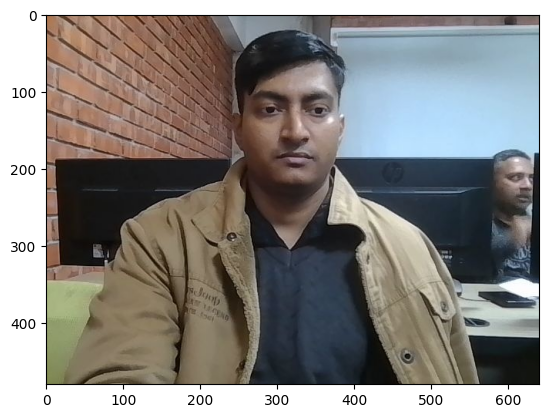

In [24]:
plt.imshow(known_image)

## Step 5: Generate Encoding for Known Face

This cell loads the `known.jpg` image and processes it to generate a unique facial encoding, which is a numerical representation of the face's features.

In [9]:
known_image = face_recognition.load_image_file('known.jpg') #Computes the 128-dimensional face encoding for the 'known' face.
known_encoding = face_recognition.face_encodings( #Computes the 128-dimensional face encoding for the 'known' face.
    known_image,
    num_jitters=50, #Enhances the robustness of the encoding by resampling the face 50 times and averaging the results.
    model='large' #Specifies the use of a more accurate (but slower) face detection and encoding model.
)[0] # Selects the encoding of the first detected face, assuming only one face is present in known.jpg.

In [23]:
print(known_image)

[[[170 120  87]
  [170 120  87]
  [170 120  87]
  ...
  [107  97  95]
  [108  98  96]
  [109  99  97]]

 [[170 120  87]
  [170 120  87]
  [170 120  87]
  ...
  [112 102 100]
  [113 103 101]
  [114 104 102]]

 [[172 119  85]
  [172 119  85]
  [172 119  85]
  ...
  [118 111 105]
  [118 111 105]
  [118 111 105]]

 ...

 [[126 135  80]
  [126 135  80]
  [126 135  80]
  ...
  [ 18  20  15]
  [ 18  20  15]
  [ 18  20  15]]

 [[126 135  80]
  [125 134  79]
  [125 134  79]
  ...
  [ 18  20  15]
  [ 18  20  15]
  [ 18  20  15]]

 [[125 134  79]
  [125 134  79]
  [125 134  79]
  ...
  [ 18  20  15]
  [ 18  20  15]
  [ 18  20  15]]]


## Step 6: Capture Test Face


In [19]:
print("Capture TEST face")
test_frame = take_photo('test.jpg')

Capture TEST face


<IPython.core.display.Javascript object>

##Step 7: Detect Faces and Generate Encodings

In [20]:
face_locations = face_recognition.face_locations(test_frame) #Detects all faces in the test_frame and returns a list of their bounding box coordinates (top, right, bottom, left).

face_encodings = face_recognition.face_encodings( #Computes 128-dimensional face encodings for each face found in test_frame.
    test_frame,
    face_locations, #Provides the exact locations of the detected faces, improving efficiency.
    num_jitters=23, #Resamples each face 23 times to create more robust encodings.
    model='large' #Uses the larger, more accurate face recognition model
)

##Step 8: Compare Faces and Draw Bounding Boxes

In [21]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings): #Loops through each detected face, unpacking its location coordinates and encoding.
    match = face_recognition.compare_faces([known_encoding], face_encoding)[0] #Compares the current face_encoding from the test_frame with the known_encoding. Returns True for a match, False otherwise.

    label = "Recognized" if match else "Unrecognized" #Assigns the text label 'Recognized' or 'Unrecognized' based on the match result.
    color = (0, 255, 0) if match else (0, 0, 255) #Sets the color of the bounding box and text to green (for recognized) or red (for unrecognized).

    cv2.rectangle(test_frame, (left, top), (right, bottom), color, 2) #Draws a rectangular bounding box around the detected face on the test_frame.
    cv2.putText(test_frame, label, (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2) #Adds the recognition label above the bounding box on the test_frame.

    print("Enter..." if match else "Unrecognized")

Enter...


##Step 10: Display Final Output Image

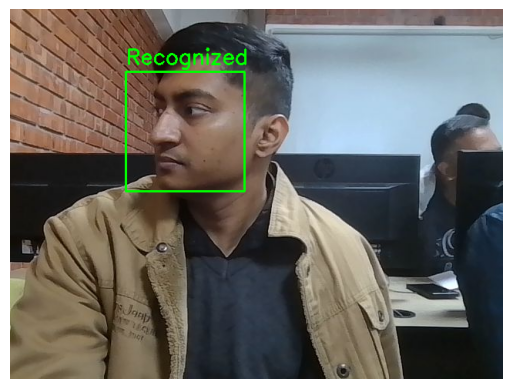

In [22]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(test_frame, cv2.COLOR_BGR2RGB)) # converts the image from OpenCV's BGR format to Matplotlib's RGB format for correct color display.
plt.axis('off')
plt.show()